In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
#Importing the Data
x = pd.read_csv("data_exercise_40.csv", usecols = range(1,120), header = 0)
x.fillna(x.mean(), inplace = True)
y = pd.read_csv('data_exercise_40.csv', usecols = range(120,121) , header = 0)


In [3]:
#Define Dataset
x, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 3)
print(x.shape, y.shape)

#Define and Evaluate Model
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, x, y, scoring = 'accuracy', cv=cv, n_jobs = -1, error_score = 'raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


(1000, 20) (1000,)
Accuracy: 0.902 (0.025)


kappa score:   0.7528500178126114


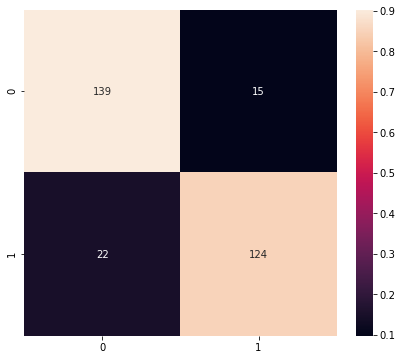

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 109)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

cm = confusion_matrix(y_test, predictions)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g')

plot_confusion_matrix(cm)

print( "kappa score:  ", cohen_kappa_score(y_test, predictions))

In [18]:
#Regression Test
x, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
model = RandomForestRegressor()

#Evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))                

MAE: -89.779 (8.057)


In [16]:
#Method 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

kappa score:   0.8069755058572949


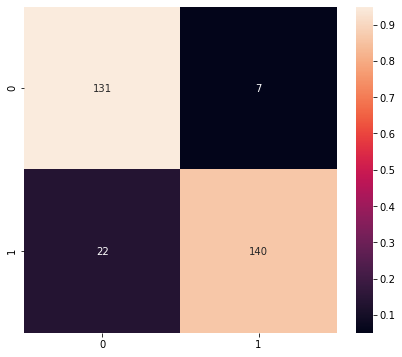

In [17]:
predictions = [round(value) for value in y_pred]

cm = confusion_matrix(y_test, predictions)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g')

plot_confusion_matrix(cm)

print( "kappa score:  ", cohen_kappa_score(y_test, predictions))